# Using Machine Learning Models to predict Apple Quality

#Overview:

For this mini project, I will be using a data set on apples from Kaggle.

(https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality)

**Goal:**
My goal with the following data set is to predict the "quality" (good or bad) of an apple using various machine learning models from the SkiKitLearn library. I will explore different parameters for these models and see how these parameters effect performance.

**Approach:**
I will use an iterative approach, showing my entire process of exploring the pros and cons of various machine learning models. I expect to have models that are both good and bad.

**Concerns:**
I do not know the source of this data, or how it was collected and created.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from itertools import combinations
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import io

Run the following cells to upload the file apple_quality.csv, available on [Kaggle](https://www.kaggle.com/datasets/nelgiriyewithana/apple-**quality**) if not already provided.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving apple_quality.csv to apple_quality.csv


In [ ]:
#Reading the file into memory
apple_data = pd.read_csv(io.BytesIO(uploaded['apple_quality.csv']))

Firstly, lets take a look at the data set we are working with. We can use .head() to take a look at the first 5 rows.:

In [ ]:
apple_data.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good



A keen eye will see that the "Acidity" variable is a different data type than the rest of the variables. This could cause issues for machine learning models. Lets run some code to check the data types of our variables.

In [ ]:
apple_data.dtypes

,0
A_id,float64
Size,float64
Weight,float64
Sweetness,float64
Crunchiness,float64
Juiciness,float64
Ripeness,float64
Acidity,object
Quality,object


We can see here that the Acidity variable is an "Object" data type from the pandas library. Lets change it to a float64 data type so we can work with it.

In [ ]:
#Removing any NULL values from the data set.
apple_data = apple_data.dropna(axis=0)

In [ ]:
#Converting the Acidity column from "object" type to float.
apple_data["Acidity"] = apple_data['Acidity'].astype(float)

Lets check our apple count, and the good to bad ratio.

In [ ]:
# prompt: Using dataframe apple_data: quality
apple_data.groupby('Quality').count().pop('A_id')

,A_id
Quality,
bad,1996
good,2004


An equal amount of good/bad apples is great for training a machine learning model, because it will recieve equivalent training identifying both groups.

Now lets identify the features which we will use to predict our target variable (quality).

In [ ]:
apple_features = ['Size','Weight','Sweetness','Crunchiness','Juiciness','Ripeness',"Acidity"]

In [ ]:
x = apple_data[apple_features]

In [ ]:
y = apple_data.Quality

Now that we have defined our features and target variable, lets split up the data into training data and validation data which we will use to train and test our first model.

In [ ]:
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this code.
train_x, val_x, train_y, val_y = train_test_split(x, y, random_state = 0)

In this particuar data set, Quality can either be "Good" or "Bad". This variable is binomial and qualitative , suggesting that we should use a model fit for binary classification. I will start by using a Logistic Regression model from the SciKit Learn library to approach this problem. Logisitic Regression is a simple, yet robust least squares regression technique that can hopefully capture some of the nuance of this problem. I don't expect it to perform very well however.

In [ ]:
from sklearn.linear_model import LogisticRegression

#Creating the model
prediction_model = LogisticRegression()

#Training the model
prediction_model.fit(train_x,train_y)

#Making predictions
predictions = prediction_model.predict(val_x)

In [ ]:
score = prediction_model.score(val_x,val_y)
print(score)

0.727


# Post Analysis #1
My model fitness is approximately 73%. Rather than moving on to a more sophisticated model right away, I will explore my options for increasing the accuracy of this logistic model.

One thing I notice is that I may be using certain features of the data set that are either redundant or irrelevant when it comes to predicting the target variable. This could cause the output of the logistic regression model to be innacurate. The more irrelevant or redundant features that are measured, the more likely my model is to extract patterns based on spurious correlations between the features, leading it in the wrong direction. In these cases, the algorithm will get thrown off between the real patterns of data, and the false patterns that only appear in the data due to natural variation.

To test my theory, I will perform a set of tests to see whether or not I am  measuring features that are irrelevant or redundant.

Based on my intuition, I would assume that the most important predictive features of apple quality would be size, weight, and ripeness. I'm probably wrong, but I will create a model that only measures these three features to showcase my thought process before I progress further.

In [ ]:
#Defining new features to measure in next model.
apple_features = ['Size','Weight','Ripeness']

x = apple_data[apple_features]

y = apple_data.Quality

In [ ]:
# Split data into training and validation data
train_x, val_x, train_y, val_y = train_test_split(x, y, random_state = 0)

In [ ]:
prediction_model2 = LogisticRegression()

prediction_model2.fit(train_x,train_y)

predictions = prediction_model2.predict(val_x)

In [ ]:
score = prediction_model2.score(val_x,val_y)
print(score)

0.589


I can see now that my intuitive approach to finding a more accurate measurement was innefective. When only measuring these 3 variables, my model fitness is approximately 59%. Considering that the output is a binary True or False, this model is only performing 9% better than if I were to guess each apple quality at random... That sucks!

I would like to create and test a model for each combination of features to find which group of features will give the model the most accurate predictions.

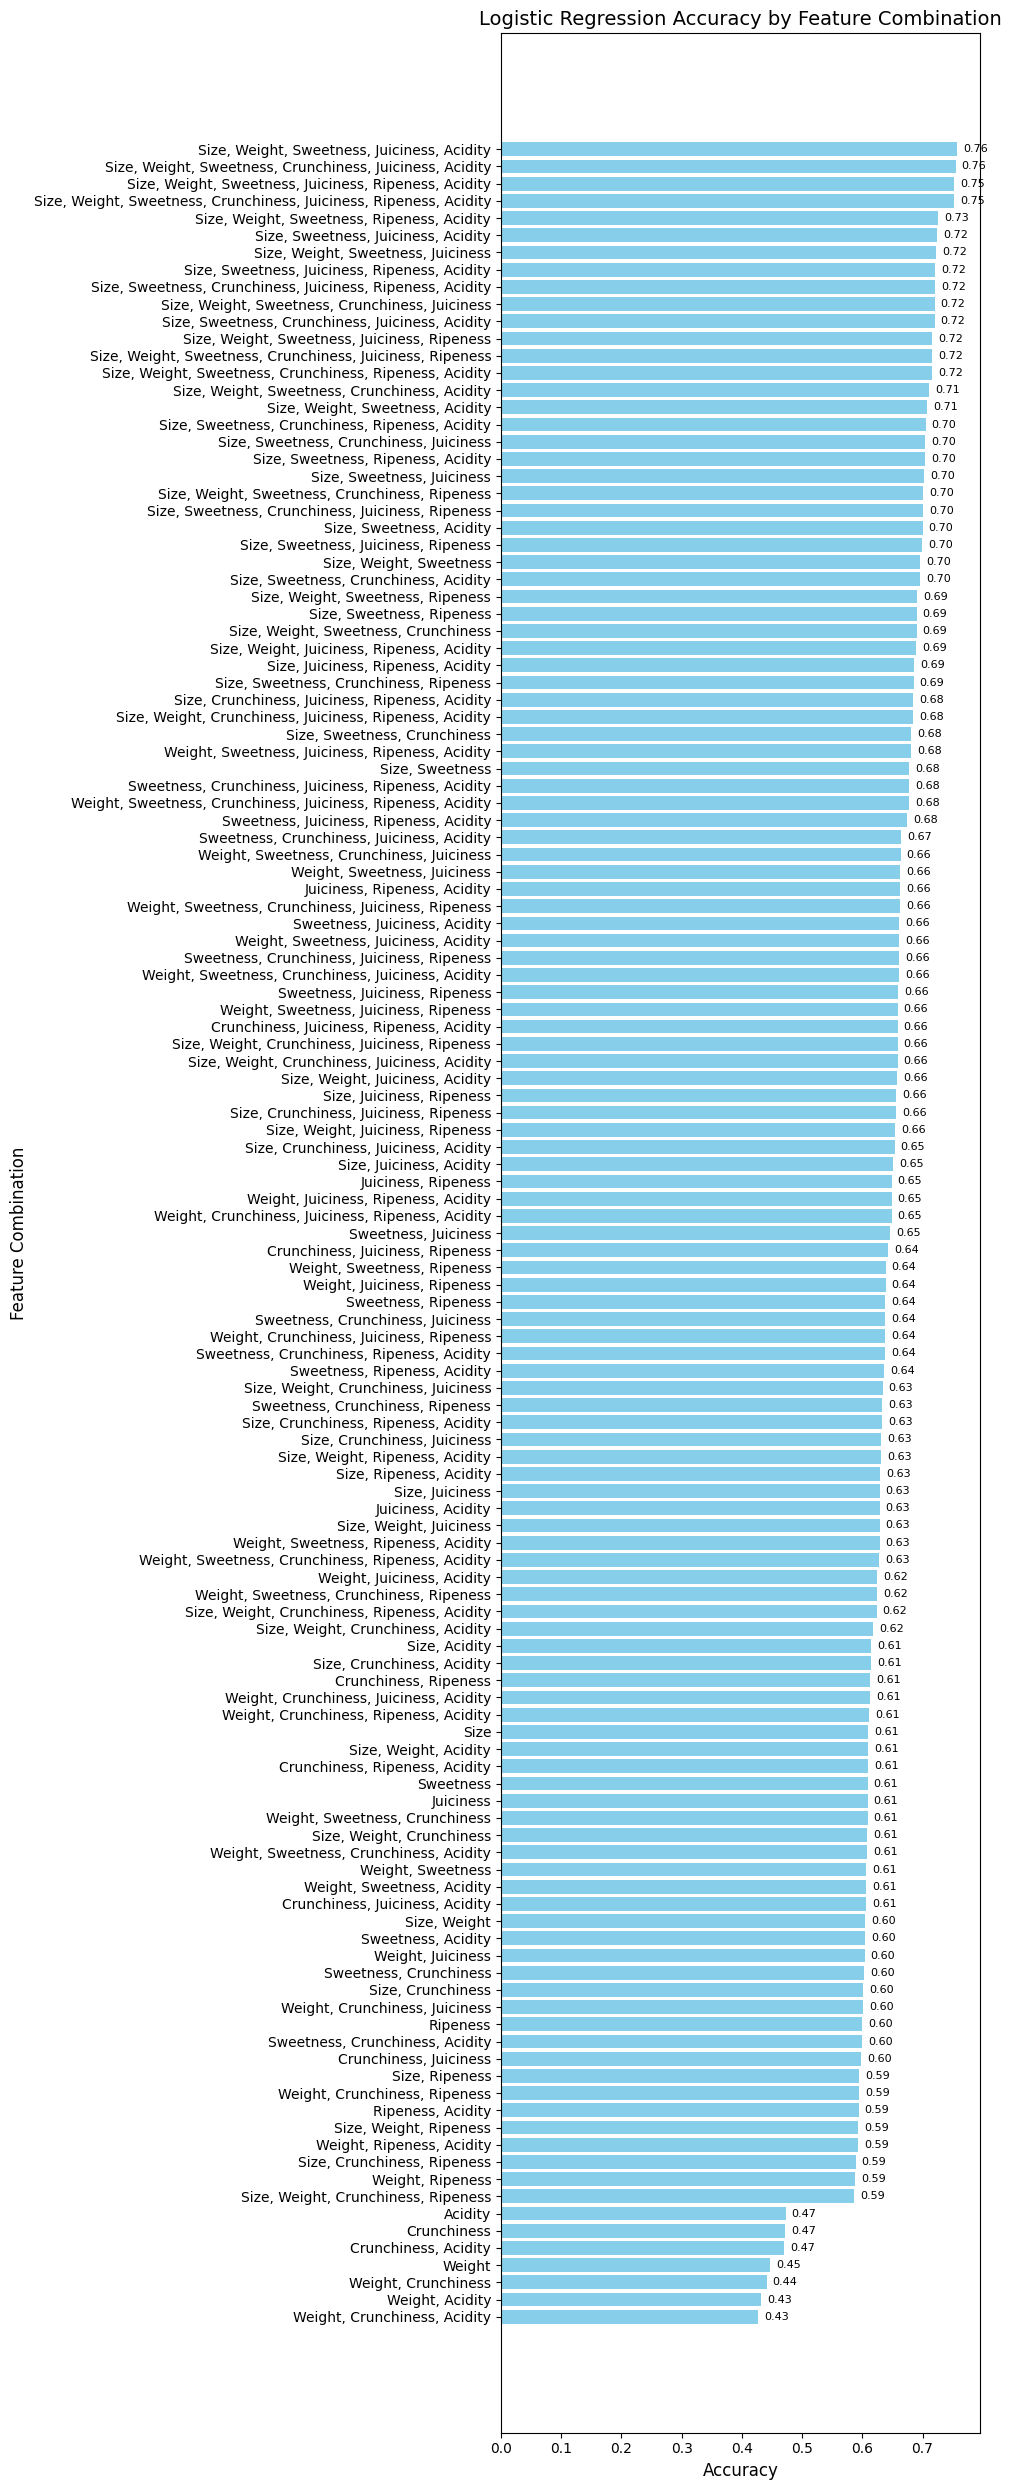

In [ ]:

# All features
features = ['Size','Weight','Sweetness','Crunchiness','Juiciness','Ripeness','Acidity']

# Assuming df is your DataFrame and 'target' is the target variable
X = apple_data[features]
y = apple_data['Quality']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

accuracy_dict = {}

# Loop over all combinations of features
for r in range(1, len(features) + 1):
    for subset in combinations(features, r):
        # Select only the current combination of features
        X_train_sub = X_train[list(subset)]
        X_test_sub = X_test[list(subset)]

        # Initialize and train the logistic regression model
        model = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence
        model.fit(X_train_sub, y_train)

        # Predict on the test set
        y_pred = model.predict(X_test_sub)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)

        # Store the combination and its accuracy
        accuracy_dict[', '.join(subset)] = accuracy

# Sorting combinations by accuracy
sorted_combinations = sorted(accuracy_dict.items(), key=lambda x: x[1], reverse=True)

# Unpacking the sorted combinations for plotting
labels, values = zip(*sorted_combinations)

# Plotting
plt.figure(figsize=(10, 25))  # Increase the second value to make the figure taller
bars = plt.barh(labels, values, color='skyblue')

plt.xlabel('Accuracy', fontsize=12)
plt.ylabel('Feature Combination', fontsize=12)
plt.title('Logistic Regression Accuracy by Feature Combination', fontsize=14)

# Increase the font size of the tick labels for better readability
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.gca().invert_yaxis()  # Invert y-axis to have the highest accuracy at the top

# Add the accuracy values on the bars for clearer comparison
for bar in bars:
    width = bar.get_width()
    label_x_pos = width + 0.01  # Adjust this value to move the label to the right of the bar
    plt.text(label_x_pos, bar.get_y() + bar.get_height()/2, f'{width:.2f}', va='center', fontsize=8)

plt.tight_layout()  # Automatically adjusts subplot params to give specified padding
plt.show()

# Post Analysis #2
Now that I have trained one model for every combination of features, I can see that the Size, Weight, Sweetness, Juciness, and Acidity are the most effective features at predicting apple quality, giving us a model accuracy of 76%. Only a marginal increase from the orginal model at 73% accuracy.

After testing various hyperparameters of the model on my own and seeing marginal increase in performace, I have concluded that this model is not able to solve our problem effectively.

The next model I will use is a random forest model. Random forests are simple decision tree type machine learning models, particularly effective at binary classification problems.

Some of the hyperparameters I will tinker with:

*   Number of trees (n_estimators) : increasing the number of trees in a random forest model can increase the accuracy, and reduce the risk of overfitting, but with computational costs and diminishing returns for high values.
*   Maximum tree depth (max_depth): increasing the maximum depth of trees can increase the accuracy, but increase the risk of overfitting. It is essential to find a good depth parameter depending on size and complexity of your data set.

* Number of samples required to split a node in the tree (min_samples_split): this parameter can increase accuracy while also increasing the risk of overfitting. This parameter  controls how detailed the decision tree boundaries become. Too detailed would lead to overfitting, not enough detail would lead to underfitting.


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# All features
features = ['Size','Weight','Sweetness','Crunchiness','Juiciness','Ripeness','Acidity']

# Declaring features and target
X = apple_data[features]
y = apple_data['Quality']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Initializing the Random Forest Classifier
forest_model = RandomForestClassifier(n_estimators=100, random_state=1)

#Training the model
forest_model.fit(X_train, y_train)

#Predicting qualities
qual_preds = forest_model.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, qual_preds)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9038


Now that we have a random forest classifier model, we can see that prediction accuracy is at 90%. This is a 14% improvement over our previous model! I will perform a set of tests to optimize the hyperparameters.

Firstly, I will test different parameters for the maximum depth of the tree. I will do this by training a model with different maximum depth values, and comparing the results.

In [ ]:
# compare accuracies with differing values of max_depth
candidate_max_depths = np.arange(4,41,2)
depth_size_scores = []

# Write loop to find the ideal tree size from candidate_max_depths
for depth_size in candidate_max_depths:

    # Initializing the Random Forest Classifier
    forest_model = RandomForestClassifier(n_estimators=100, max_depth = depth_size, random_state=42)

    #Training the model
    forest_model.fit(X_train, y_train)

    #Predicting qualities
    qual_preds = forest_model.predict(X_test)

    depth_size_scores.append(accuracy_score(y_test, qual_preds))

In [ ]:
#Observing results using a simple dataframe

depth_table = pd.DataFrame({
    'Max_Depth': candidate_max_depths,
    'Accuracy_Score': depth_size_scores
})

depth_table.head()

,Max_Depth,Accuracy_Score
0,4,0.82875
1,6,0.86750
2,8,0.87125
3,10,0.89125
4,12,0.89000


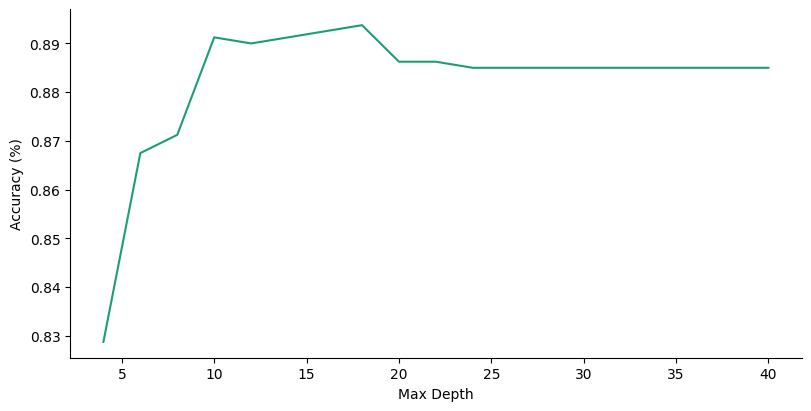

In [ ]:
# @title Max Depth vs Accuracy

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Max_Depth']
  ys = series['Accuracy_Score']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(8, 4), layout='constrained')
df_sorted = depth_table.sort_values('Max_Depth', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Max Depth')
_ = plt.ylabel('Accuracy (%)')

Looking at these results, we can see that a near optimal parameter for the Maximum Tree Depth is about 10-20 nodes deep.

Next I will try to optimize the number of trees parameter (n_estimators) using the same technique.

In [ ]:
# compare accuracies with differing values for n_estimators
candidate_tree_amounts = np.arange(10,400,20)
tree_number_scores = []

# Write loop to find the ideal tree size from candidate_tree_amounts
for tree_number in candidate_tree_amounts:

    # Initializing the Random Forest Classifier
    forest_model = RandomForestClassifier(n_estimators = tree_number, max_depth = 100, random_state=42)

    #Training the model
    forest_model.fit(X_train, y_train)

    #Predicting qualities
    qual_preds = forest_model.predict(X_test)

    tree_number_scores.append(accuracy_score(y_test, qual_preds))

In [ ]:
tree_count_table = pd.DataFrame({
    'Tree_Count': candidate_tree_amounts,
    'Accuracy_Score': tree_number_scores
})

tree_count_table.head()

,Tree_Count,Accuracy_Score
0,10,0.85750
1,30,0.88875
2,50,0.88875
3,70,0.88875
4,90,0.88875


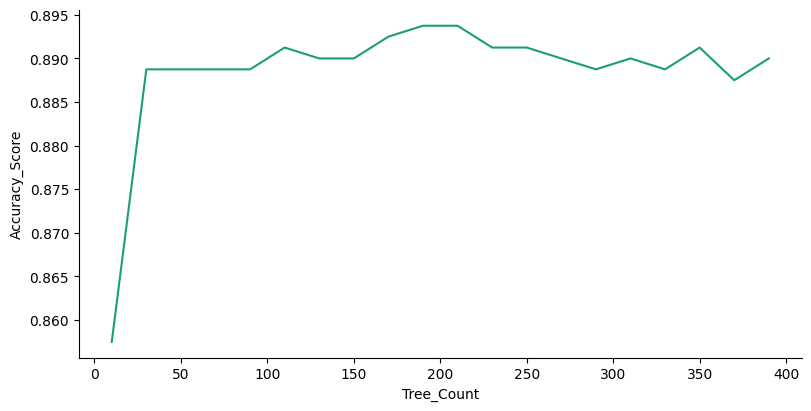

In [ ]:
# @title Tree_Count vs Accuracy_Score

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Tree_Count']
  ys = series['Accuracy_Score']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(8, 4), layout='constrained')
df_sorted = tree_count_table.sort_values('Tree_Count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Tree_Count')
_ = plt.ylabel('Accuracy_Score')

Now, looking at this test, we can see that the changing tree count has increasing, but little to no returns after about 30 trees. I will settle for 50 for this parameter.

Next, I will test the 3rd parameter: Number of samples required to split a node in the tree (min_samples_split).

Since I dont want to limit the results of the following tests, I will place a high maximum depth on the model when testing different different values for min_samples_split. The model may need a high maximum depth to test this parameter effectively.

In [ ]:
# compare accuracies with differing values of max_depth
candidate_min_split_amounts = np.arange(2,15,1)
min_split_scores = []

# Write loop to find the ideal tree size from candidate_max_depths
for min_split_amount in candidate_min_split_amounts:

    # Initializing the Random Forest Classifier
    forest_model = RandomForestClassifier(n_estimators = 300, max_depth = 1000, min_samples_split = min_split_amount, random_state=42)

    #Training the model
    forest_model.fit(X_train, y_train)

    #Predicting qualities
    qual_preds = forest_model.predict(X_test)

    min_split_scores.append(accuracy_score(y_test, qual_preds))

In [ ]:
min_split_table = pd.DataFrame({
    'Min_split_amount': candidate_min_split_amounts,
    'Accuracy_Score': min_split_scores
})

min_split_table.head()

,Min_split_amount,Accuracy_Score
0,2,0.89000
1,3,0.89250
2,4,0.89250
3,5,0.89125
4,6,0.89625


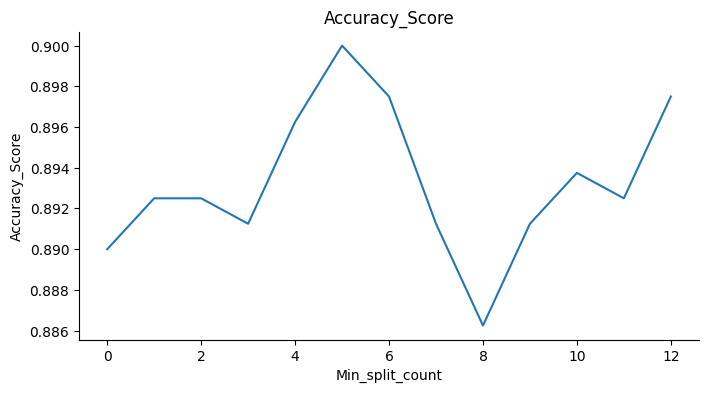

In [ ]:
# @title Accuracy_Score

from matplotlib import pyplot as plt
min_split_table['Accuracy_Score'].plot(kind='line', figsize=(8, 4), title='Accuracy_Score')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('Min_split_count')
_ = plt.ylabel('Accuracy_Score')

Observing the line plot, it would seem that 5 is the best parameter setting. Ideally, I would test each parameter value a number of times with different training and test data splits, and average the results for each  value to find the true best setting. But considering the computational cost of that, I will settle with 3 as my min_sample_split value. The higher I set the parameter, the more likely the model is to underfit the data, and the lower, the more likely the model is to overfit the data.

Now, I will to use these 3 parameter settings together in one model. I predict that the model will have minimal accuracy improvements over the model I began with, because each of these tests seem to have minimal impact on the performance individually. But hopefully, the new parameters will at least lead to a positive change in model accuracy.

In [ ]:
# All features
features = ['Size','Weight','Sweetness','Crunchiness','Juiciness','Ripeness','Acidity']

# Declaring features and target
X = apple_data[features]
y = apple_data['Quality']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Random Forest Classifier
forest_model = RandomForestClassifier(n_estimators=1000, max_depth = 15, min_samples_split = 2, random_state=1)

#Training the model
forest_model.fit(X_train, y_train)

#Predicting qualities
qual_preds = forest_model.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, qual_preds)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9100


#Post Analysis #4

**Potential Issues**

1. The main issue that sticks out to me is the small size of this data set. This data set only has 4000 observations. If I had more observations, I could definitely improve the model accuracy. But acquiring more data is not always cheap or easy.

2. I am not performing an adequate amount of testing: For each of these tests, I am only testing each parameter one time. Perhaps if tested each parameter 100 times on different random seeds of the training data and validation data, I could find values for paramaters that have better results on average than what we found. It would be computationally costly.

3. I am not testing for all variations of parameters: Ideally, I could test all parameters at the same time, and only change one individual parameter value each test. This would result in one test for every combination of parameters. Currently I am only optimizing for one parameter at a time, but this doesn't take into account how each parameter affects one another.

4. I didn't take into account the same issues I had with the logistic regression model: In my logistic regression model, I found that some of the features I measured had actually been causing decreases in the models ability to accurately predict the quality of an apple. To adress this, I would perform the same test I did with the logistic regression model.

5. Issues with the data set: For a data set of this size, it may be futile to perform these tests and get results that will significantly increase the models prediction accuracy. There may be some inconsistencies and/or outliers in the data that either confuse the model during training, or are hard for the model to predict during testing.
